In [1]:
import pandas as pd
import numpy as np

#for visualising
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
from matplotlib import style
rcParams['figure.figsize']=20,10

from scipy import stats

import re
import string
import nltk
from nltk.corpus import stopwords
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [2]:
wine = pd.read_csv('https://raw.githubusercontent.com/Murivianna/stats/main/winemag.csv')

# Data cleanning

In [3]:
wine.shape  #checking how many rows and colunms in the dataset

(64043, 14)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64043 entries, 0 to 64042
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             60639 non-null  float64
 1   country                60608 non-null  object 
 2   description            60639 non-null  object 
 3   designation            43177 non-null  object 
 4   points                 60639 non-null  float64
 5   price                  56344 non-null  float64
 6   province               60608 non-null  object 
 7   region_1               50709 non-null  object 
 8   region_2               23316 non-null  object 
 9   taster_name            48120 non-null  object 
 10  taster_twitter_handle  45896 non-null  object 
 11  title                  60639 non-null  object 
 12  variety                60639 non-null  object 
 13  winery                 60639 non-null  object 
dtypes: float64(3), object(11)
memory usage: 6.8+ MB


In [5]:
wine.isnull().values.sum()

143990

In [6]:
print(wine.isnull().sum())

Unnamed: 0                3404
country                   3435
description               3404
designation              20866
points                    3404
price                     7699
province                  3435
region_1                 13334
region_2                 40727
taster_name              15923
taster_twitter_handle    18147
title                     3404
variety                   3404
winery                    3404
dtype: int64


In [7]:
wine = wine.drop(['designation','region_2','taster_name','taster_twitter_handle','region_1'], axis=1) # dleting the colunms with high amount of null values.

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64043 entries, 0 to 64042
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   60639 non-null  float64
 1   country      60608 non-null  object 
 2   description  60639 non-null  object 
 3   points       60639 non-null  float64
 4   price        56344 non-null  float64
 5   province     60608 non-null  object 
 6   title        60639 non-null  object 
 7   variety      60639 non-null  object 
 8   winery       60639 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.4+ MB


In [9]:
wine.isnull().values.sum()

34993

In [10]:
wine.dropna(inplace=True)

In [11]:
wine.shape

(56317, 9)

In [12]:
wine['country'].value_counts()

US                        25056
France                     8381
Italy                      8036
Spain                      3068
Portugal                   2312
Chile                      2060
Argentina                  1739
Austria                    1283
Australia                  1062
Germany                     947
New Zealand                 664
South Africa                578
Israel                      226
Greece                      219
Canada                      101
Bulgaria                     64
Romania                      61
Uruguay                      61
Hungary                      57
Croatia                      42
Turkey                       40
Georgia                      37
Slovenia                     31
England                      31
Mexico                       30
Moldova                      29
Brazil                       25
Lebanon                      19
Morocco                       8
Czech Republic                6
Cyprus                        6
Peru    

In [13]:
wine.head(10)

Unnamed: 0   country                                        description  \
1          1.0  Portugal  This is ripe and fruity, a wine that is smooth...   
2          2.0        US  Tart and snappy, the flavors of lime flesh and...   
3          3.0        US  Pineapple rind, lemon pith and orange blossom ...   
4          4.0        US  Much like the regular bottling from 2012, this...   
5          5.0     Spain  Blackberry and raspberry aromas show a typical...   
6          6.0     Italy  Here's a bright, informal red that opens with ...   
7          7.0    France  This dry and restrained wine offers spice in p...   
8          8.0   Germany  Savory dried thyme notes accent sunnier flavor...   
9          9.0    France  This has great depth of flavor with its fresh ...   
10        10.0        US  Soft, supple plum envelopes an oaky structure ...   

    points  price           province  \
1     87.0   15.0              Douro   
2     87.0   14.0             Oregon   
3     87.0   13.0           Michigan   
4     87.0   65.0             Oregon   
5     87.0   15.0     Northern Spain   
6     87.0   16.0  Sicily & Sardinia   
7     87.0   24.0             Alsace   
8     87.0   12.0        Rheinhessen   
9     87.0   27.0             Alsace   
10    87.0   19.0         California   

                                                title             variety  \
1       Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2       Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5   Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   
6    Terre di Giurfo 2013 Belsito Frappato (Vittoria)            Frappato   
7               Trimbach 2012 Gewurztraminer (Alsace)      Gewürztraminer   
8   Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...      Gewürztraminer   
9   Jean-Baptiste Adam 2012 Les Natures Pinot Gris...          Pinot Gris   
10  Kirkland Signature 2011 Mountain Cuvée Caberne...  Cabernet Sauvignon   

                 winery  
1   Quinta dos Avidagos  
2             Rainstorm  
3            St. Julian  
4          Sweet Cheeks  
5                Tandem  
6       Terre di Giurfo  
7              Trimbach  
8           Heinz Eifel  
9    Jean-Baptiste Adam  
10   Kirkland Signature

In [14]:
wine.country = pd.Categorical(wine.country)
wine['country_no'] = wine.country.cat.codes
wine.winery = pd.Categorical(wine.winery)
wine['winery_no'] = wine.winery.cat.codes
wine.variety = pd.Categorical(wine.variety)
wine['variety_no'] = wine.variety.cat.codes

In [15]:
wine.head(5)

Unnamed: 0   country                                        description  \
1         1.0  Portugal  This is ripe and fruity, a wine that is smooth...   
2         2.0        US  Tart and snappy, the flavors of lime flesh and...   
3         3.0        US  Pineapple rind, lemon pith and orange blossom ...   
4         4.0        US  Much like the regular bottling from 2012, this...   
5         5.0     Spain  Blackberry and raspberry aromas show a typical...   

   points  price        province  \
1    87.0   15.0           Douro   
2    87.0   14.0          Oregon   
3    87.0   13.0        Michigan   
4    87.0   65.0          Oregon   
5    87.0   15.0  Northern Spain   

                                               title             variety  \
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)      Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)          Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
5  Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...  Tempranillo-Merlot   

                winery  country_no  winery_no  variety_no  
1  Quinta dos Avidagos          29       9531         364  
2            Rainstorm          38       9579         350  
3           St. Julian          38      10632         390  
4         Sweet Cheeks          38      10818         354  
5               Tandem          35      10879         480

# Section 1) Statistics

In [16]:
average = wine["price"].mean() # checking the average price for the wine
print(average)

35.39693165474013


In [17]:
middlePoint = wine["price"].median() # checking the middle point for the price
print(middlePoint)

25.0


In [18]:
trend = wine["price"].mode() # the price most occurent in the datatset
print(trend)

0    20.0
dtype: float64


In [19]:
trend = wine["country"].mode()  # checking which country appears the most 
print(trend)

0    US
Name: country, dtype: category
Categories (41, object): ['Argentina', 'Armenia', 'Australia', 'Austria', ..., 'Turkey', 'US', 'Ukraine', 'Uruguay']


In [20]:
trend = wine["province"].mode() # checking which province appears the most
print(trend)

0    California
dtype: object


In [21]:
trend = wine["variety"].mode()  # checking which variety appears the most
print(trend)

0    Pinot Noir
Name: variety, dtype: category
Categories (571, object): ['Abouriou', 'Agiorgitiko', 'Aglianico', 'Aidani', ..., 'Zlahtina', 'Zweigelt', 'Çalkarası', 'Žilavka']


In [22]:
trend = wine["winery"].mode() # checking which winery appears the most
print(trend)

0    Wines & Winemakers
Name: winery, dtype: category
Categories (12434, object): ['1+1=3', '10 Knots', '100 Percent Wine', '1000 Stories', ..., 'Öko', 'Ökonomierat Rebholz', 'àMaurice', 'Štoka']


In [23]:
wine.describe()

Unnamed: 0        points         price    country_no     winery_no  \
count  56317.000000  56317.000000  56317.000000  56317.000000  56317.000000   
mean   30329.548254     88.443827     35.396932     26.487508   6424.783103   
std    17506.890279      3.049703     39.209177     12.652440   3597.835702   
min        1.000000     80.000000      4.000000      0.000000      0.000000   
25%    15147.000000     86.000000     17.000000     13.000000   3562.000000   
50%    30352.000000     88.000000     25.000000     35.000000   6609.000000   
75%    45519.000000     91.000000     42.000000     38.000000   9548.000000   
max    60638.000000    100.000000   2500.000000     40.000000  12433.000000   

         variety_no  
count  56317.000000  
mean     287.396168  
std      159.567845  
min        0.000000  
25%       98.000000  
50%      354.000000  
75%      400.000000  
max      570.000000

In [24]:
print(wine.nunique())

Unnamed: 0     56317
country           41
description    54168
points            21
price            304
province         374
title          53922
variety          571
winery         12434
country_no        41
winery_no      12434
variety_no       571
dtype: int64


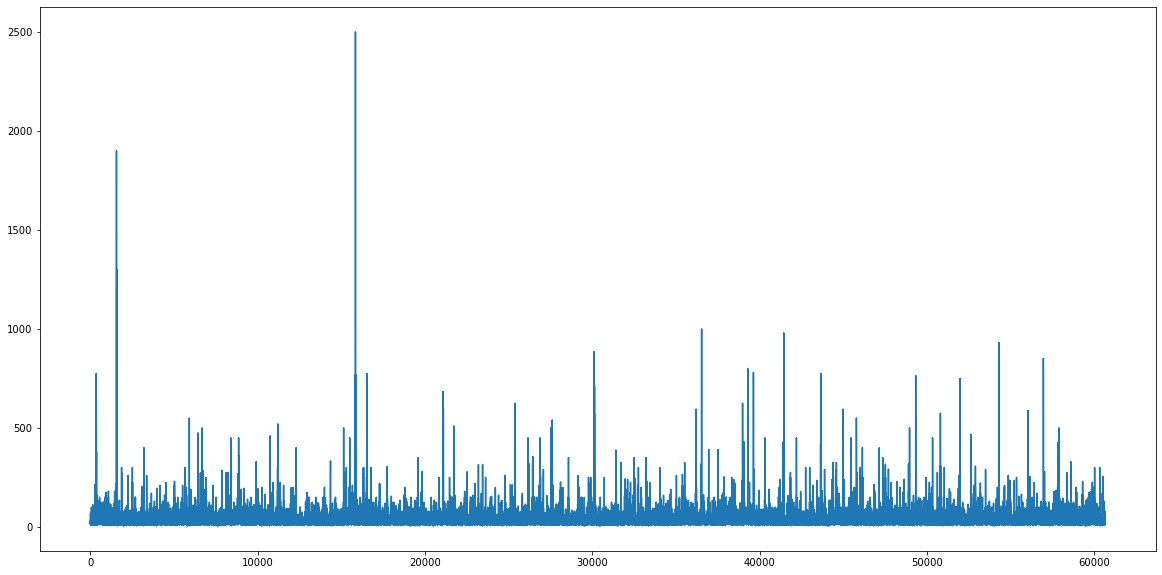

In [25]:
plt.plot(wine["price"],label='Price history')

In [26]:
stats.trim_mean(wine["price"], 0.1)

29.453889690378425

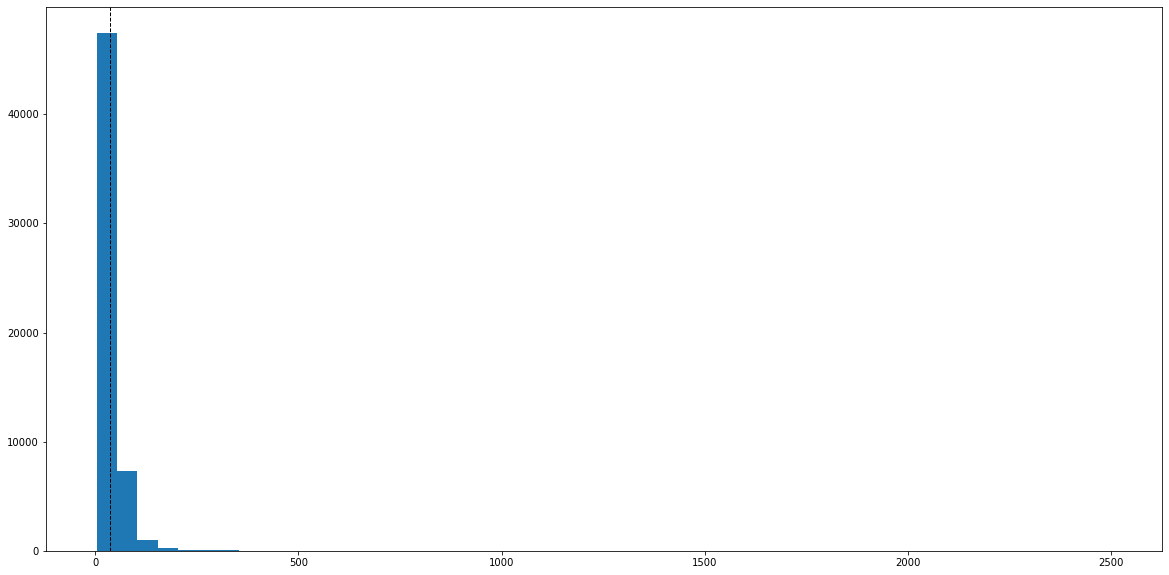

In [27]:
plt.hist(wine["price"], bins = 50)
plt.axvline(average, color='k', linestyle='dashed', linewidth=1)

In [28]:
wine["price"].std()

39.20917698902632

In [29]:
wine["price"].var()

1537.3595601567908

<AxesSubplot:>

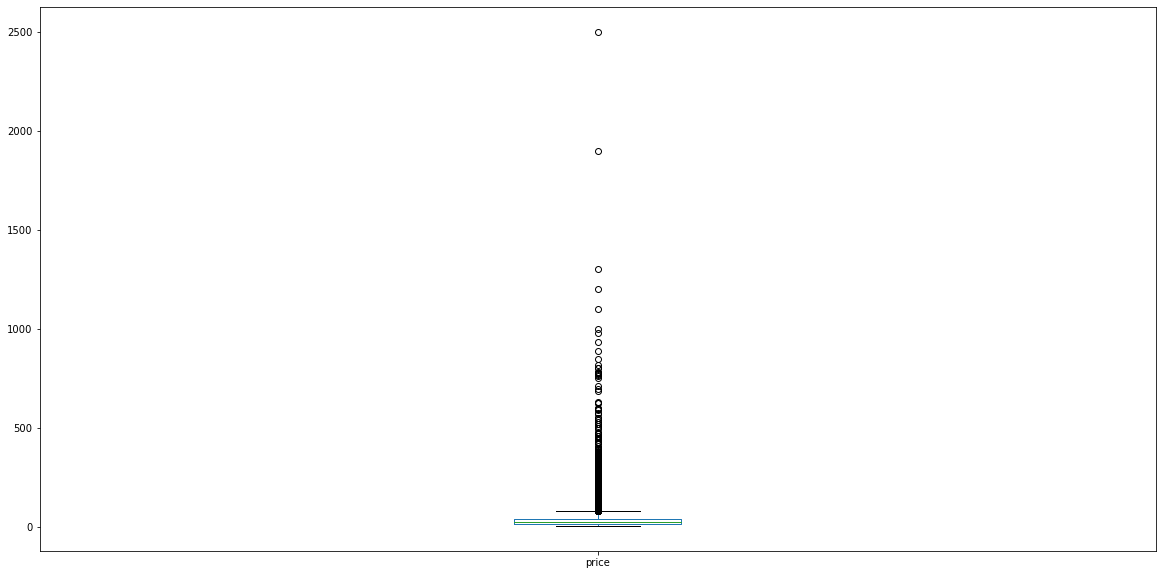

In [30]:
wine["price"].plot.box()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points'>

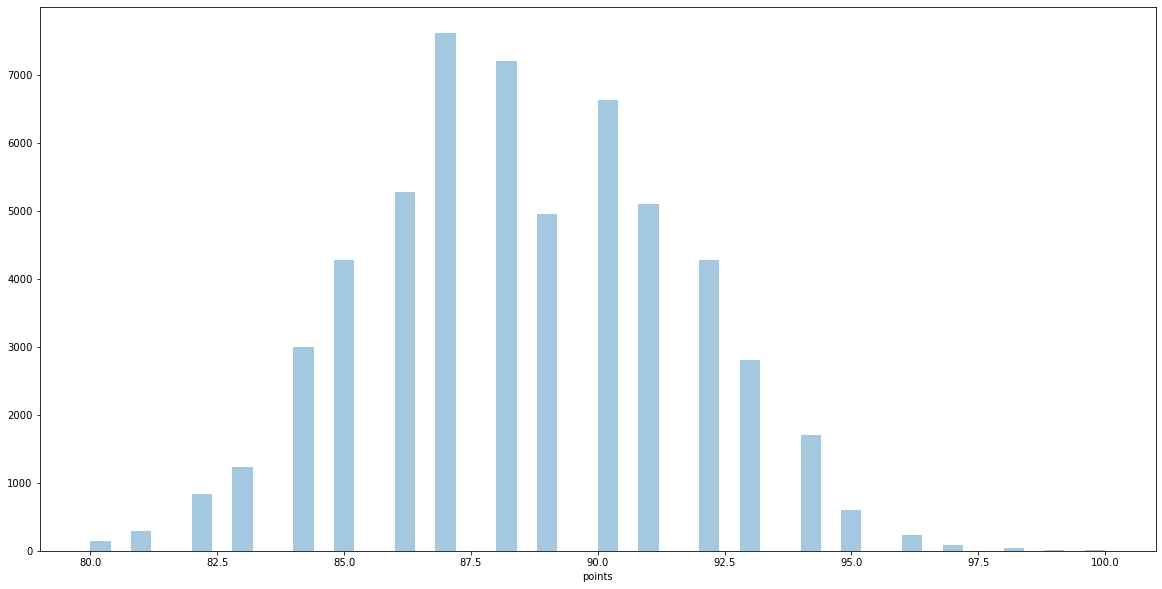

In [31]:
sns.distplot(wine["points"], kde = False)

In [32]:
price = wine.groupby(['country','points'])['price'].mean().reset_index()

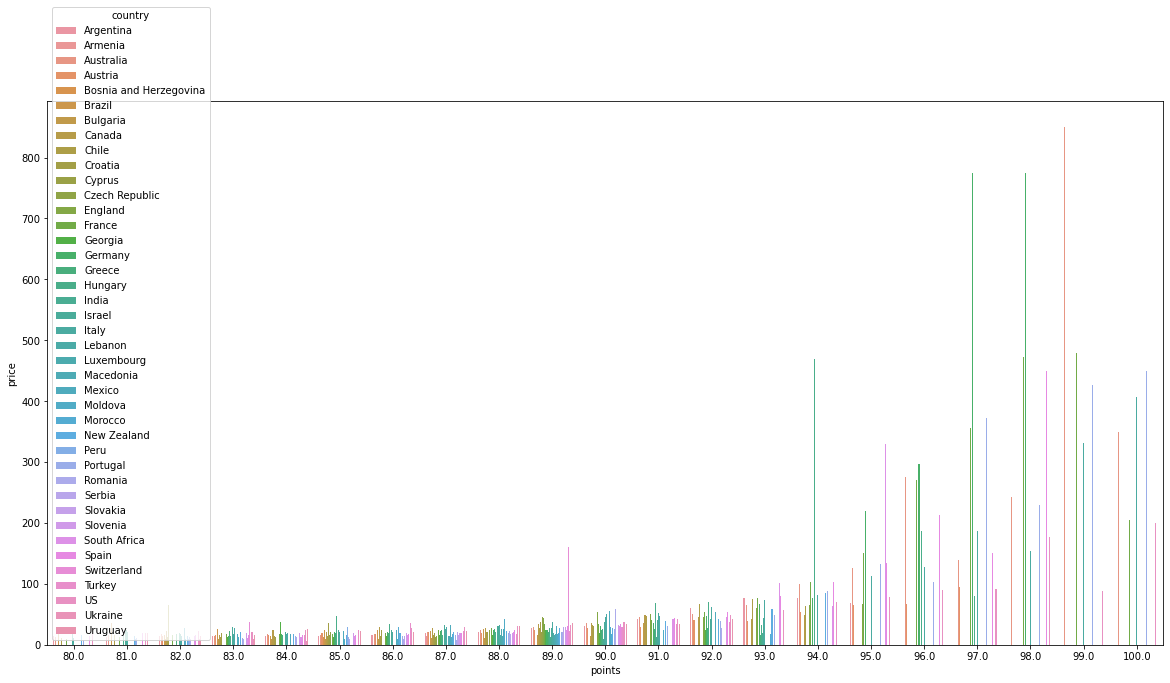

In [33]:
ax = sns.barplot(x="points", y="price", hue="country", data=price)

<AxesSubplot:xlabel='country', ylabel='points'>

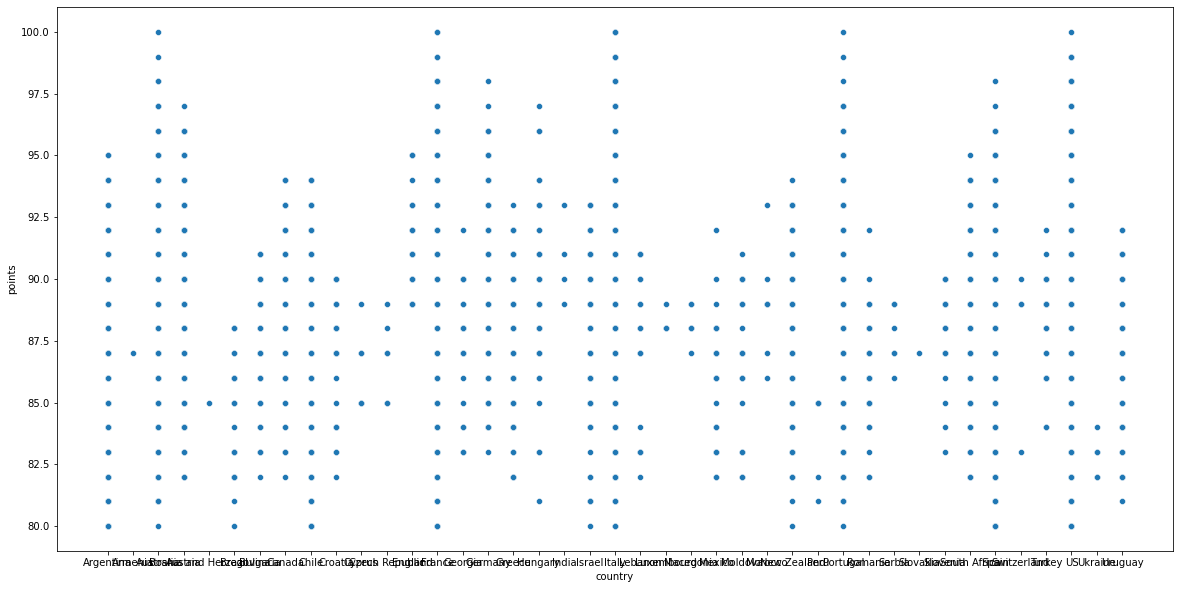

In [34]:
sns.scatterplot(data=wine, x="country", y="points")

<AxesSubplot:xlabel='country', ylabel='price'>

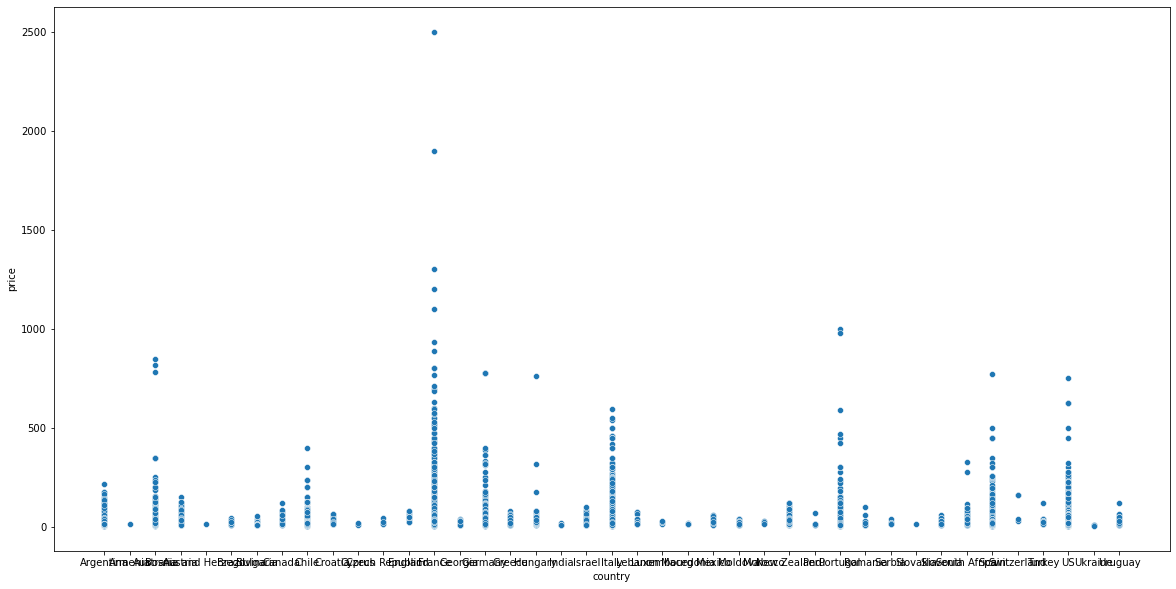

In [35]:
sns.scatterplot(data=wine, x="country", y="price")

In [36]:
from scipy import stats

In [37]:
stats.trim_mean(wine["price"], 0.1)

29.453889690378425

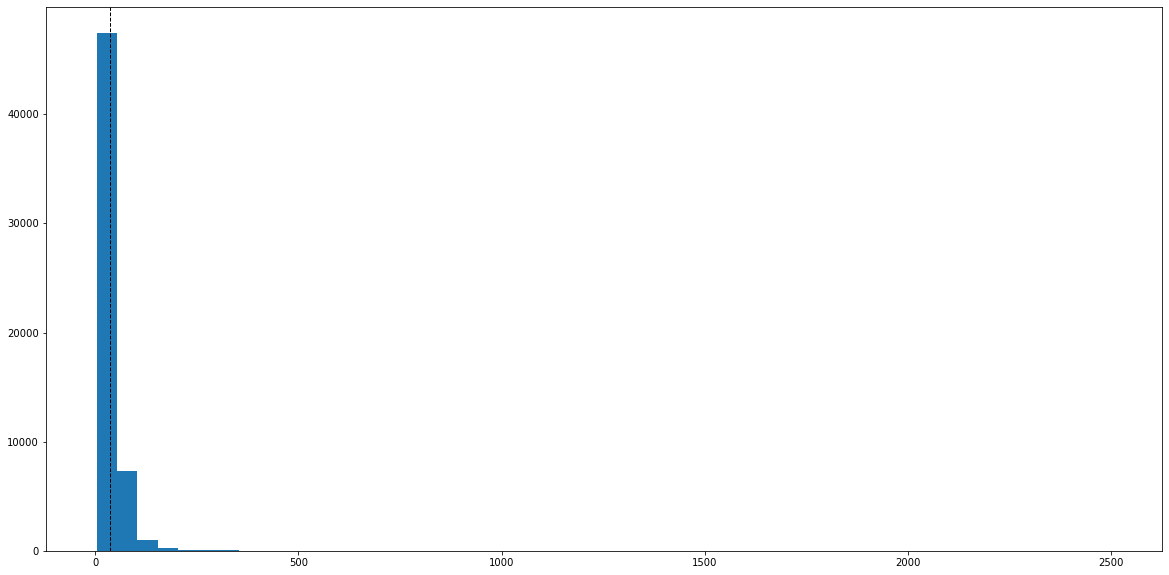

In [38]:
plt.hist(wine["price"], bins = 50)
plt.axvline(average, color='k', linestyle='dashed', linewidth=1)

In [39]:
skewness = wine.skew()
print(skewness)

Unnamed: 0    -0.003595
points         0.050075
price         13.800195
country_no    -0.557008
winery_no     -0.111862
variety_no    -0.260662
dtype: float64


In [40]:
skewnessPoints = wine["points"].skew()
print(skewnessPoints)

0.05007528892278638


In [41]:
kurtosisPoints = wine["points"].kurt()
print(kurtosisPoints)

-0.35576286264865553


<AxesSubplot:>

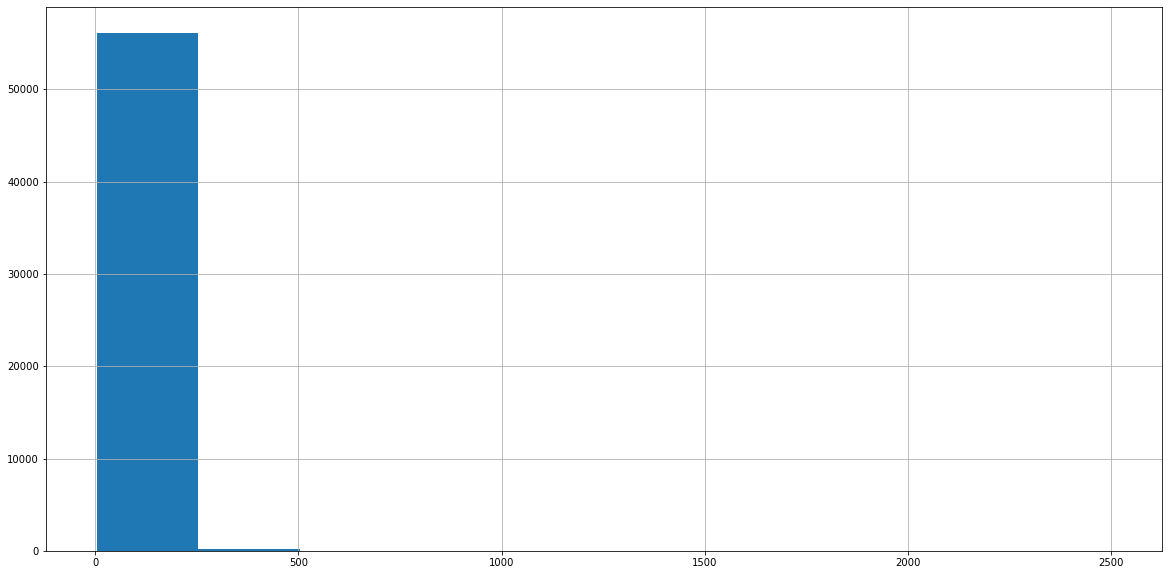

In [42]:
wine["price"].hist()

In [43]:
wine.corr()

Unnamed: 0    points     price  country_no  winery_no  variety_no
Unnamed: 0    1.000000  0.027430  0.007834    0.003423  -0.011753    0.003681
points        0.027430  1.000000  0.434985    0.017735  -0.006549   -0.015489
price         0.007834  0.434985  1.000000    0.011658  -0.008197   -0.074980
country_no    0.003423  0.017735  0.011658    1.000000   0.062557    0.086436
winery_no    -0.011753 -0.006549 -0.008197    0.062557   1.000000    0.045368
variety_no    0.003681 -0.015489 -0.074980    0.086436   0.045368    1.000000

<AxesSubplot:title={'center':'Correlation Matrix'}>

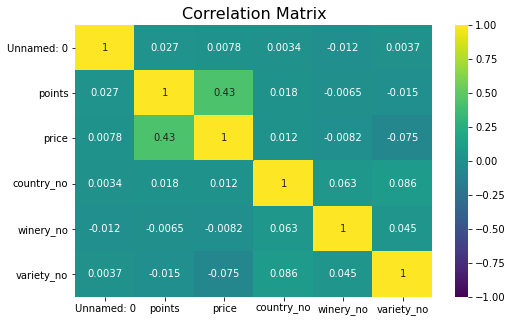

In [44]:
corr = wine.corr()
corr

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.set_title('Correlation Matrix', fontsize=16)

sns.heatmap(corr, vmin=-1, vmax=1, cmap='viridis', annot=True)

<AxesSubplot:xlabel='country_no', ylabel='price'>

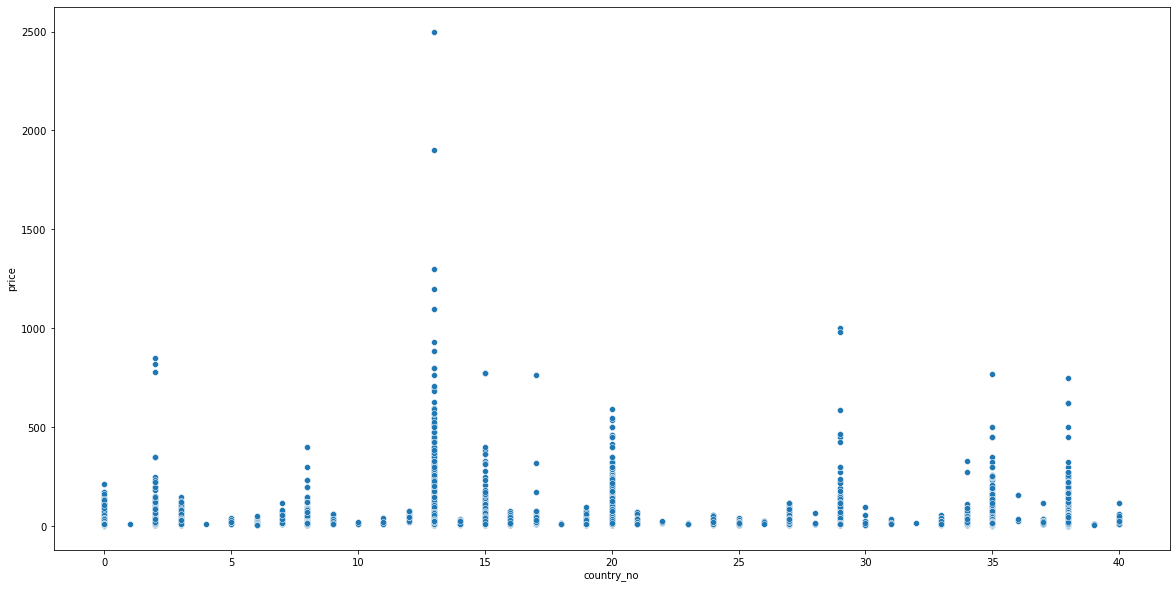

In [45]:
sns.scatterplot(data=wine, x="country_no", y="price")

<AxesSubplot:xlabel='country_no', ylabel='points'>

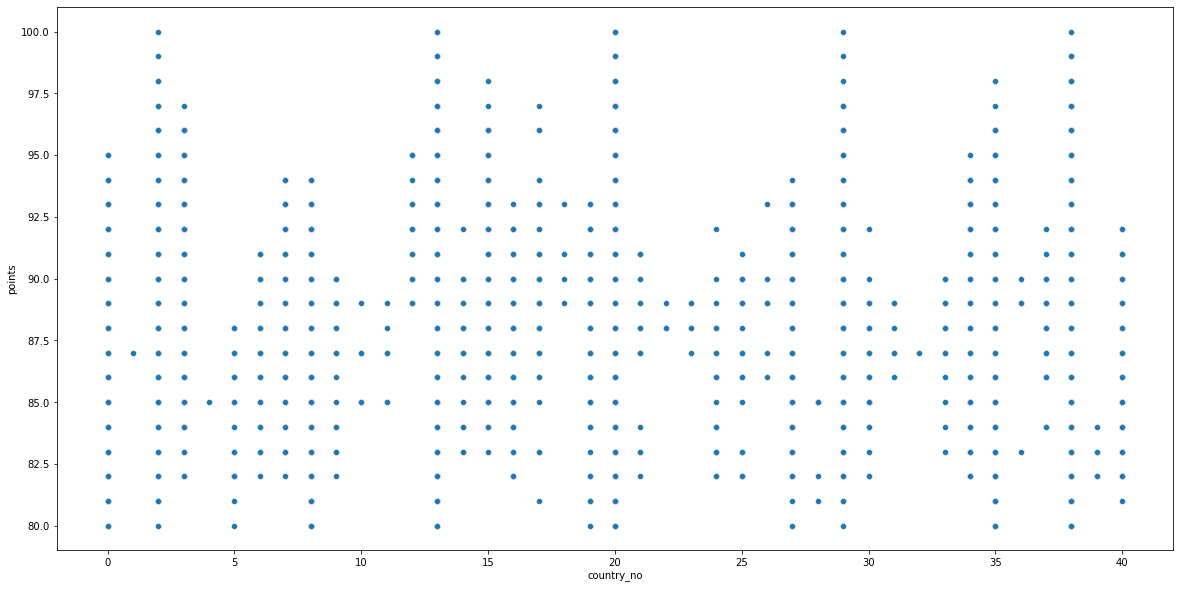

In [46]:
sns.scatterplot(data=wine, x="country_no", y="points")

In [47]:
averageItaly = wine['country'] == 'Italy'
mean_for_italy = wine.loc[averageItaly, 'points'].mean()
print(mean_for_italy)
province_Italy = wine['country'] == 'Italy'
mode_for_italy = wine.loc[province_Italy, 'province'].mode()
print(mode_for_italy)
variety_Italy = wine['country'] == 'Italy'
mode_italy = wine.loc[variety_Italy, 'variety'].mode()
print(mode_italy)

88.61933797909407
0    Tuscany
dtype: object
0    Red Blend
Name: variety, dtype: category
Categories (571, object): ['Abouriou', 'Agiorgitiko', 'Aglianico', 'Aidani', ..., 'Zlahtina', 'Zweigelt', 'Çalkarası', 'Žilavka']


In [48]:
averageFrance = wine['country'] == 'France'
mean_for_france = wine.loc[averageFrance, 'points'].mean()
print(mean_for_france)
province_France = wine['country'] == 'France'
mode_for_france = wine.loc[province_France, 'province'].mode()
print(mode_for_france)
variety_France = wine['country'] == 'France'
mode_france = wine.loc[variety_France, 'variety'].mode()
print(mode_france)

88.82090442667939
0    Bordeaux
dtype: object
0    Bordeaux-style Red Blend
Name: variety, dtype: category
Categories (571, object): ['Abouriou', 'Agiorgitiko', 'Aglianico', 'Aidani', ..., 'Zlahtina', 'Zweigelt', 'Çalkarası', 'Žilavka']


                           points      price
country                                     
Argentina               86.713629  23.745831
Armenia                 87.000000  14.000000
Australia               88.648776  36.430320
Austria                 90.109119  30.923617
Bosnia and Herzegovina  85.000000  13.000000
Brazil                  84.400000  23.000000
Bulgaria                87.828125  13.921875
Canada                  89.267327  35.712871
Chile                   86.625243  21.244660
Croatia                 87.238095  24.809524
Cyprus                  86.333333  16.000000
Czech Republic          86.833333  23.666667
England                 91.290323  52.161290
France                  88.820904  41.425367
Georgia                 87.567568  18.270270
Germany                 89.824710  40.970433
Greece                  87.210046  21.881279
Hungary                 89.385965  52.491228
India                   90.750000  13.500000
Israel                  88.238938  31.641593
Italy     

<ipython-input-49-a64ed8ac188c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_country = wine.groupby(['country'])['points','price'].mean()


<Figure size 1440x1080 with 0 Axes>

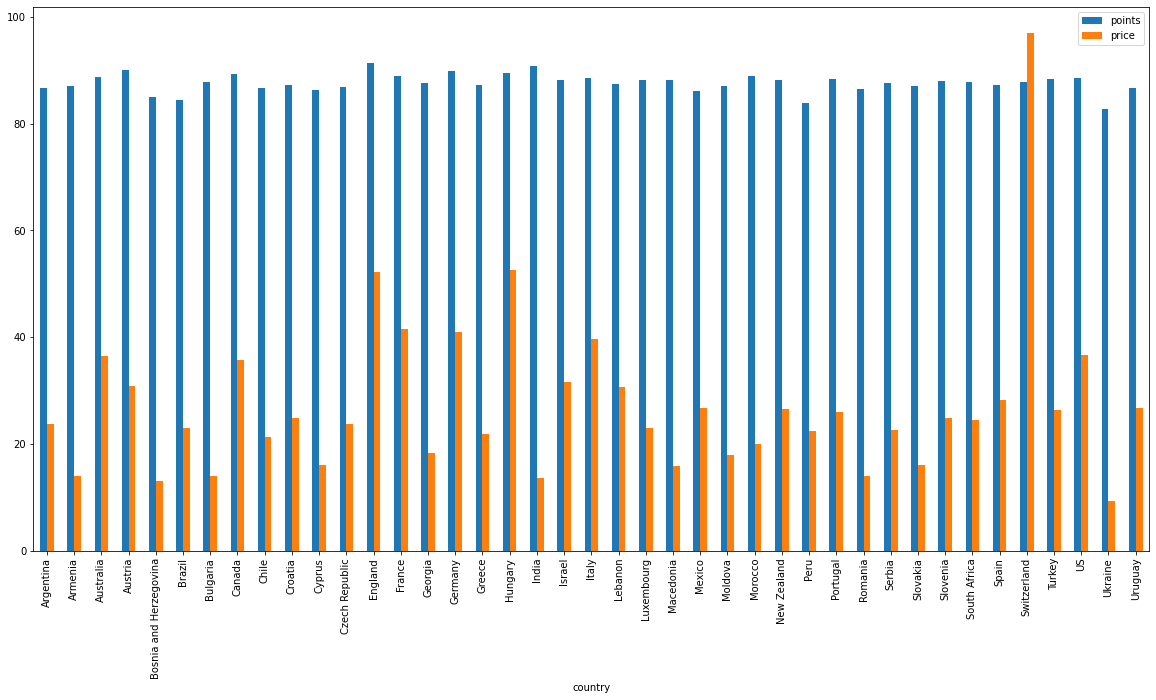

In [49]:
plt.figure(figsize=(20,15));
avg_country = wine.groupby(['country'])['points','price'].mean()
print(avg_country)
avg_country.plot.bar();

country
Argentina                 23.745831
Armenia                   14.000000
Australia                 36.430320
Austria                   30.923617
Bosnia and Herzegovina    13.000000
Brazil                    23.000000
Bulgaria                  13.921875
Canada                    35.712871
Chile                     21.244660
Croatia                   24.809524
Cyprus                    16.000000
Czech Republic            23.666667
England                   52.161290
France                    41.425367
Georgia                   18.270270
Germany                   40.970433
Greece                    21.881279
Hungary                   52.491228
India                     13.500000
Israel                    31.641593
Italy                     39.624191
Lebanon                   30.578947
Luxembourg                23.000000
Macedonia                 15.833333
Mexico                    26.800000
Moldova                   17.965517
Morocco                   20.000000
New Zealand         

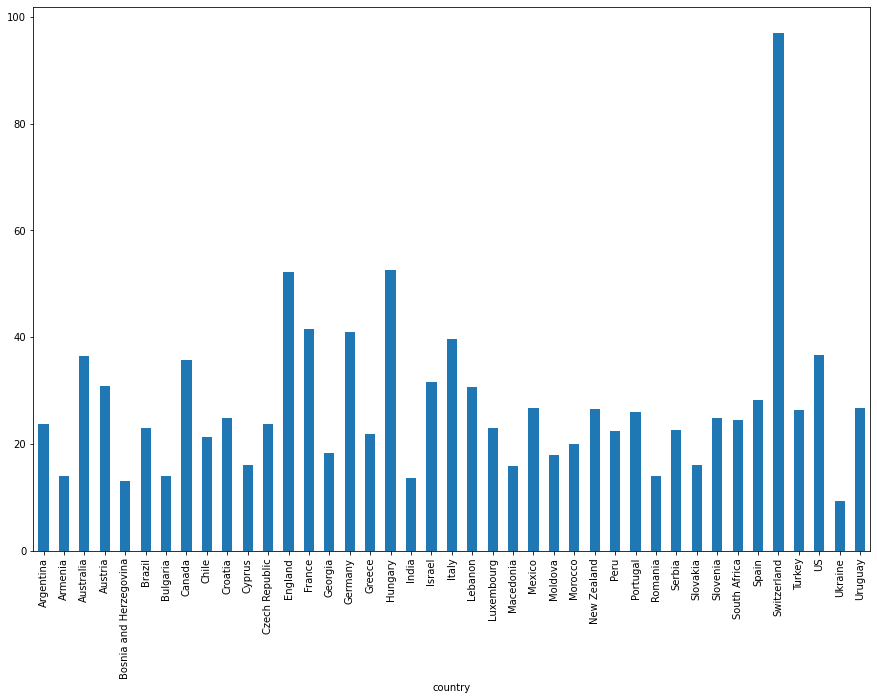

In [50]:
avg_price = wine.groupby(['country'])['price'].mean()
plt.figure(figsize=(15,10));
print(avg_price)
avg_price.plot.bar();

In [51]:
price_country = wine.groupby(["country"])["price"].mean().reset_index()
print(price_country)

                   country      price
0                Argentina  23.745831
1                  Armenia  14.000000
2                Australia  36.430320
3                  Austria  30.923617
4   Bosnia and Herzegovina  13.000000
5                   Brazil  23.000000
6                 Bulgaria  13.921875
7                   Canada  35.712871
8                    Chile  21.244660
9                  Croatia  24.809524
10                  Cyprus  16.000000
11          Czech Republic  23.666667
12                 England  52.161290
13                  France  41.425367
14                 Georgia  18.270270
15                 Germany  40.970433
16                  Greece  21.881279
17                 Hungary  52.491228
18                   India  13.500000
19                  Israel  31.641593
20                   Italy  39.624191
21                 Lebanon  30.578947
22              Luxembourg  23.000000
23               Macedonia  15.833333
24                  Mexico  26.800000
25          

In [52]:
import scipy as sp
import scipy.stats as stats
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
X = wine['price']      # INDEPENDENT VARIABLE: The variable used to predict the dependent variable 
y = wine['points'] # DEPENDENT VARIABLE: Variable we wish to predict

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [54]:
print("lr.coef_:{} ".format(lr.coef_)) 
print("lr.intercept_:{} ".format(lr.intercept_)) 

lr.coef_:[[0.03255183]] 
lr.intercept_:[87.29048194] 


In [55]:
# Display the score values by calling lr
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score (R^2): {:.3f}".format(lr.score(X_test, y_test)))

Training set score: 0.183
Test set score (R^2): 0.212


In [56]:
# Prediction Values
y_pred=lr.predict(X_test)
print(y_pred)

[[87.77875944]
 [88.36469244]
 [87.87641494]
 ...
 [88.56000344]
 [88.10427777]
 [89.24359194]]


In [57]:
wine_pred = pd.DataFrame({'Actual Value': y_test.flatten(), 'Predicted Value': y_pred.flatten()})
wine_pred

Actual Value  Predicted Value
0              84.0        87.778759
1              88.0        88.364692
2              86.0        87.876415
3              89.0        87.713656
4              83.0        87.616000
...             ...              ...
11259          83.0        88.592555
11260          89.0        87.811311
11261          88.0        88.560003
11262          90.0        88.104278
11263          89.0        89.243592

[11264 rows x 2 columns]

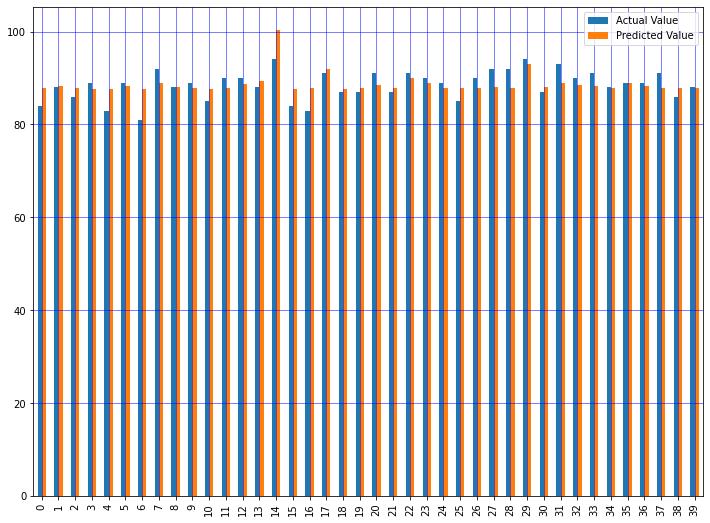

In [58]:
wine1 = wine_pred.head(40)
wine1.plot(kind='bar',figsize=(12,9))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='purple')
plt.show()

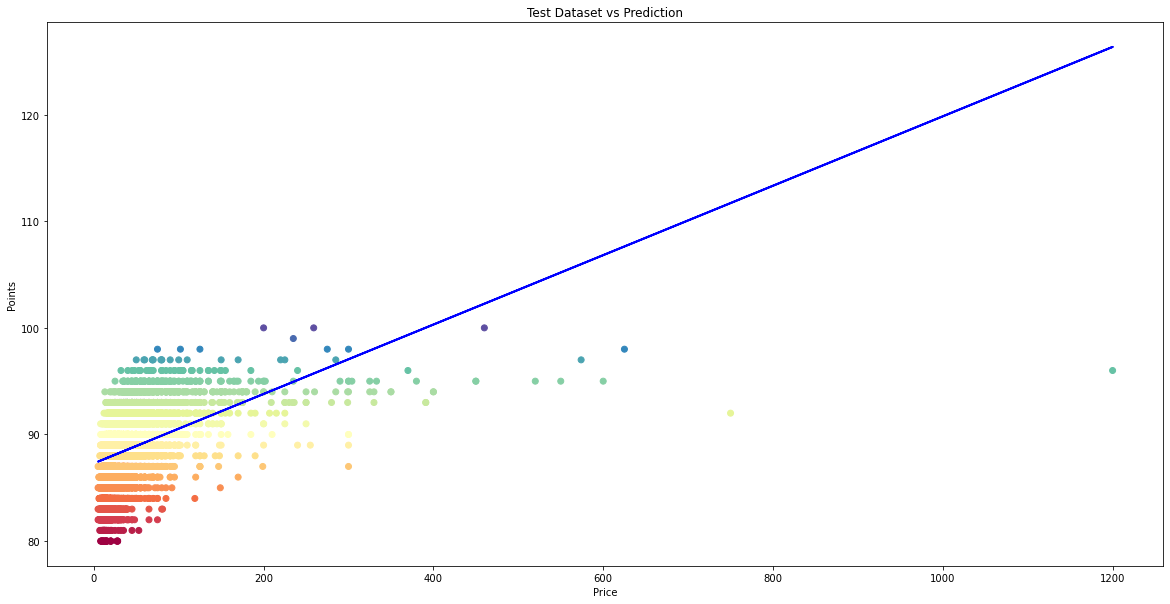

In [59]:
plt.scatter(X_test, y_test, c=y_test, cmap='Spectral')
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':100})
plt.title('Test Dataset vs Prediction')
plt.xlabel('Price')
plt.ylabel('Points')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

In [60]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [61]:
print('Mean Absolut Error (MAE):',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolut Error (MAE): 2.193483254826471
Mean Squared Error (MSE): 7.333031414175718
Root Mean Squared Error (RMSE): 2.707957055452637


# EDA  

The data cleanning was done at the very top of the codes, otherwise the statistics number wouldnt be accurate due to the high number of null values.

In [62]:
# count how many times the countries are mentioned. Graph shows the top 10 wine countries 
country = wine.groupby('country').size().reset_index(name='count').sort_values('count', ascending=False)
px.bar(country.head(10), x='country', y='count', template='simple_white')

In [63]:
# World map show the count in a worldmap
px.choropleth(country, locations = 'country', locationmode='country names', 
color = 'count', template = 'simple_white',range_color=[2000,15000], color_continuous_scale='Viridis')

In [64]:
#histogram of the variable price
fig = px.histogram(wine, x="price", nbins = 250, template='simple_white')
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="linear"))

In [65]:
#describe information grouping by countries and showing only the top 10.
wine.groupby('country').price.agg(['count', 'min', 'max', 'mean']).reset_index().sort_values('count', ascending=False).head(10)

country  count  min     max       mean
38         US  25056  4.0   750.0  36.557511
13     France   8381  5.0  2500.0  41.425367
20      Italy   8036  5.0   595.0  39.624191
35      Spain   3068  4.0   770.0  28.292373
29   Portugal   2312  5.0  1000.0  25.981401
8       Chile   2060  5.0   400.0  21.244660
0   Argentina   1739  4.0   215.0  23.745831
3     Austria   1283  7.0   150.0  30.923617
2   Australia   1062  6.0   850.0  36.430320
15    Germany    947  5.0   775.0  40.970433

In [66]:
#showing a pie chart how many times a province is mentioned when the country is France

france = wine[wine.country == 'France'].groupby('province').size().reset_index(name='count').sort_values('count', ascending=False)
px.pie(france, names = 'province', values = 'count')

In [67]:
#showing a pie chart how many times a province is mentioned when the country is France
italy = wine[wine.country == 'Italy'].groupby('province').size().reset_index(name='count').sort_values('count', ascending=False)

px.pie(italy, names = 'province', values = 'count')

In [68]:
# Top 10 varieties of wine tested.
wine.groupby('variety').size().reset_index(name='count').sort_values('count', ascending=False).head(10)

variety  count
354                Pinot Noir   5908
98                 Chardonnay   5100
61         Cabernet Sauvignon   4350
384                 Red Blend   3965
46   Bordeaux-style Red Blend   2512
390                  Riesling   2327
418           Sauvignon Blanc   2275
454                     Syrah   1889
400                      Rosé   1473
265                    Merlot   1411

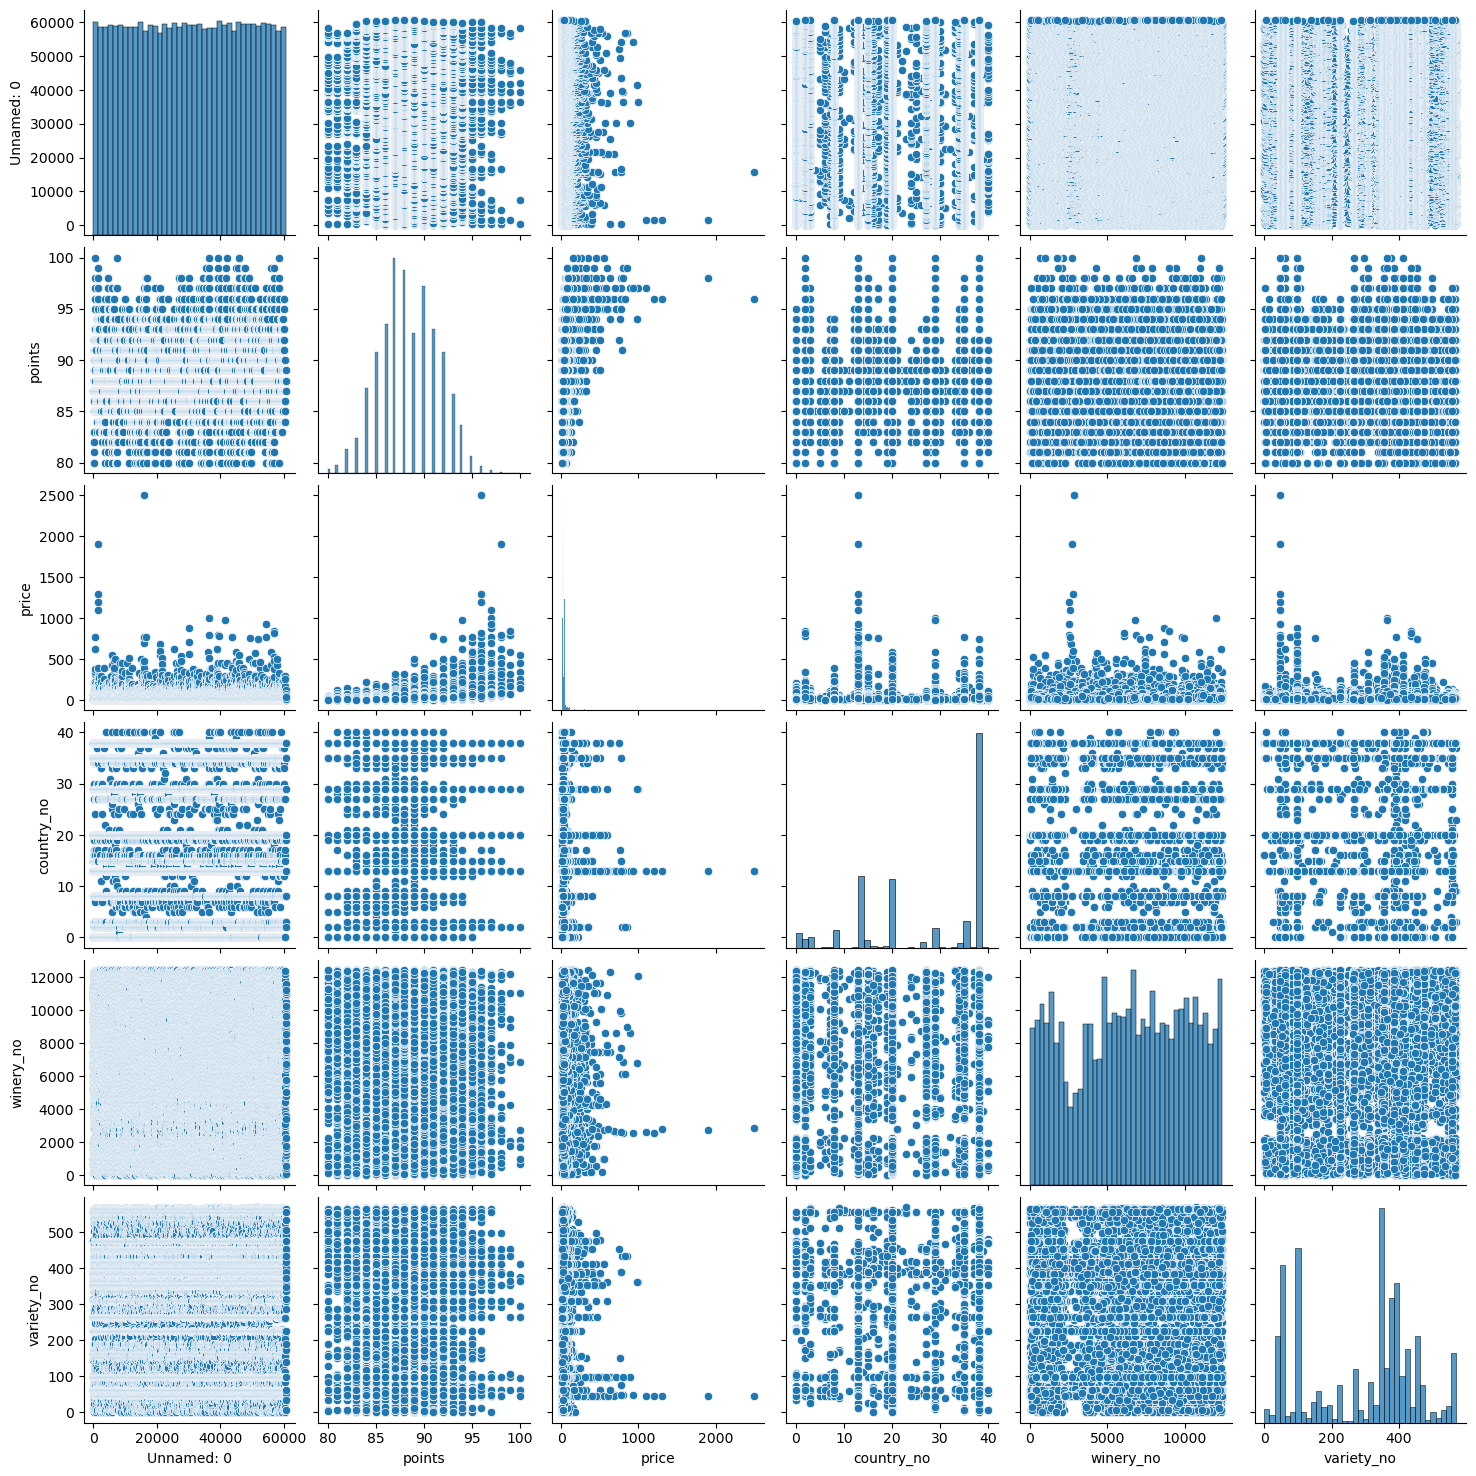

In [69]:
sns.pairplot(wine)